In [1]:
print('all ok')

all ok


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'../Datasets/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

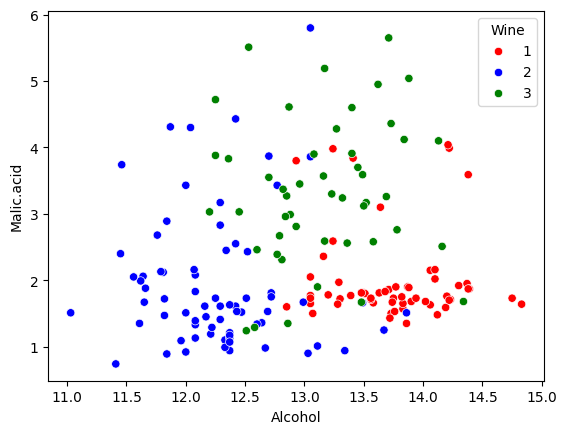

In [30]:
colour={1:'red',2:'blue',3:'green'}

sns.scatterplot(x=df['Alcohol'],y=df['Malic.acid'],hue=df['Wine'],palette=colour)

In [12]:
X=df.drop('Wine',axis=1)
Y=df['Wine']

In [13]:
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=27)

In [16]:
x_train.shape

(142, 13)

In [17]:
x_test.shape

(36, 13)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)


In [25]:
np.round(x_train[['Alcohol','Malic.acid']].describe(),1)

,Alcohol,Malic.acid
count,142.0,142.0
mean,13.1,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.6
50%,13.1,1.8
75%,13.7,3.0
max,14.8,5.8


In [26]:
np.round(x_train_scaled[['Alcohol','Malic.acid']].describe(),1)

,Alcohol,Malic.acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


Text(0.5, 1.0, 'after Scaling')

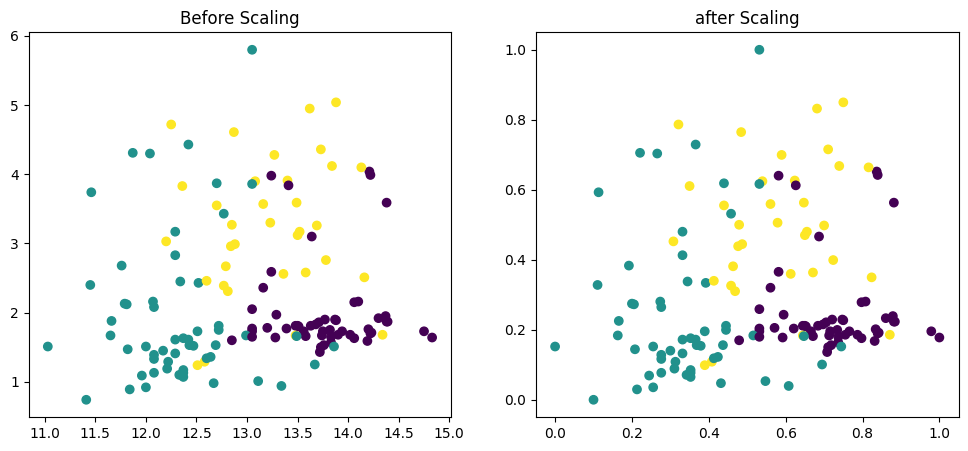

In [32]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train["Alcohol"],x_train["Malic.acid"],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled["Alcohol"],x_train_scaled["Malic.acid"],c=y_train)
ax2.set_title("after Scaling")

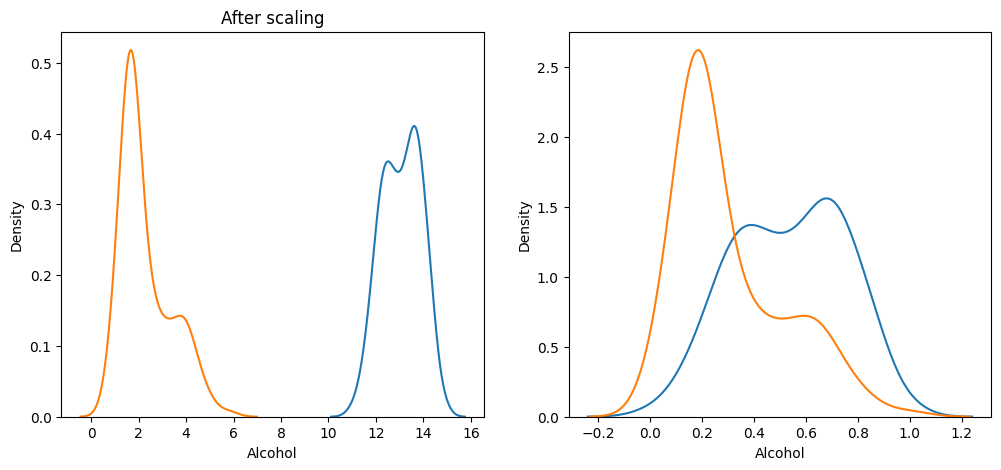

In [40]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
sns.kdeplot(x=x_train['Alcohol'],ax=ax1)
sns.kdeplot(x=x_train['Malic.acid'],ax=ax1)

ax1.set_title("After scaling")
sns.kdeplot(x=x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x=x_train_scaled['Malic.acid'],ax=ax2)

plt.show()

In [43]:
def plot_kde(column_name):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

    ax1.set_title(f"Before scaling of {column_name}")
    sns.kdeplot(x_train[column_name],ax=ax1)

    ax2.set_title(f"After scaling of {column_name}")
    sns.kdeplot(x_train_scaled[column_name],ax=ax2)
    plt.show

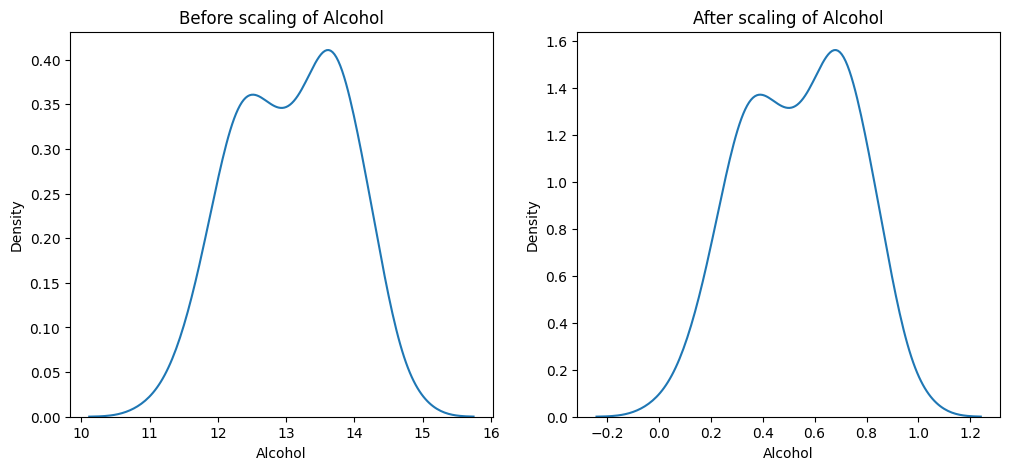

In [47]:
plot_kde('Alcohol')